# **Chapter 2 데이터 다루기 : 수상한 생선을 조심하라**

## **02-1훈련 세트와 테스트 세트**



### 1) 지도학습과 비지도학습

* 머신러닝의 종류 (67쪽)

      지도학습 : 입력데이터(feautes)와 target(정답)으로 이루어진 훈련데이터로 학습 (3,4,5장)
      비지도학습 : target은 없고 입력데이터(features)만 있는 학습 (6장)
      강화학습 : 결과에 대한 보상이 있는 학습

도미와 방어 이름을 알기 위한 k-최근접이웃 분류 모델은? 지도학습.

### 2) 훈련 세트와 테스트 세트

train dataset, test dataset으로 나누는 이유 : 교재 68쪽

49마리 생선 데이터를 train(35), test(14)로 나누자. (왜 35 : 14로 나눌까? (이렇게 <u>섞지 말고 순서에 따라</u> 데이터를 둘로 나누면 안되는 이유를 72쪽에서 알아본다)

In [ ]:
bl = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]
bw = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

In [ ]:
sl = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
sw = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
l=bl+sl
w=bw+sw

In [ ]:
data=[[l,w] for l,w in zip(l,w)]
target=[1]*35+[0]*14

분류 알고리즘인 knn 방법을 이용하기 위해 일단 사이킷런의 `neighbors` 모듈에 있는 k-최근접이웃 분류를 위한 클래스 `KNeighborsClassifier`를 불러 객체(`kn`)를 만들어두자.

<u>교재를 보지 말고 코드를 직접 입력해보자.</u>

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

m=KNeighborsClassifier()

`fish_data, fish_target`은 49개 값으로 이루어져 있는데 윗부분의 35개는 도미, 아래 14개는 빙어 데이터다.

잠깐 슬라이싱 복습. 아래 둘은 같다.

In [ ]:
data[0:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

In [ ]:
data[:5]

[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0]]

끝값을 적어주지 않으면 마지막 항목까지 포함된다.

In [ ]:
data[44:]

[[12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]

In [ ]:
import pandas as pd

df = pd.DataFrame(data)

print(df.head())

      0      1
0  25.4  242.0
1  26.3  290.0
2  26.5  340.0
3  29.0  363.0
4  29.0  430.0


In [ ]:
import pandas as pd

df = pd.DataFrame(data)

print(df.tail())

       0     1
44  12.2  12.2
45  12.4  13.4
46  13.0  12.2
47  14.3  19.7
48  15.0  19.9



슬라이싱 방법을 이용하여 `fish_data, fish_target`의 처음 35개는 훈련 데이터세트(`train_input, train_target`)로, 나머지 14개는 테스트 데이터세트(`test_input, test_traget`)로 만들자.

In [ ]:
train=data[:35]
target1=target[:35]

test=data[35:]
target2=target[35:]

데이터가 준비되었으니 train 데이터로 학습하고(`kn.fit()`) test 데이터로 결과를 평가(`kn.score()`)해보자.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

m=KNeighborsClassifier()
m.fit(train,target1)
m.score(test,target2)

0.0

정확도 점수가 0이다. 14개 test data 가운데 단 하나도 맞추지 못했다.

이런 최악의 결과가 나온 이유가 무엇일까?

### 3) 샘플링 편향

위의 모델이 실패한 이유는 학습 데이터에 빙어가 하나도 없기 때문이다(교재 72-73쪽 설명을 보라).

이처럼 <u>훈련데이터와 테스트데이터에 있는 target값의 분포가 서로 많이 다를 때 생길 수 있는 잘못된 결과를 **sampling bias** </u>라고 부른다.



즉 <u>모델을 만들기 위해 데이터를 train set과 test set으로 나눌 때에는 전체 데이터를 골고루 섞어서 샘플링편향이 안 생기도록 해야한다. </u>

이런 작업을 할 때에는 리스트보다는 **넘파이**를 이용하는 것이 편하다.

### 4) 넘파이

앞에서 우리는 `fish_data`를 2차원 리스트로 만들었는데 일반적인 방법이 아니다. 앞으로는 리스트가 아닌 넘파이 배열(numpy array)을 이용한다.

배열의 차원(축)을 설명하는 그림(74쪽)을 보고 1,2,3차원 배열을 이해하자.

넘파이는 아래와 같이 부르자.

In [ ]:
l= [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0,
               9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
w= [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
               500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
               700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0,
               6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
data = [[l, w] for l, w in zip(l, w)]
target = [1]*35 + [0]*14

`np.array()`을 이용하여 2차원 리스트 `fish_data`를 2차원 넘파이 배열 `input_arr`로 만들고 1차원 리스트 `fish_target`을 넘파이 배열
`target_arr`로 만들자.

In [ ]:
import numpy as np

data=np.array(data)
target=np.array(target)

In [ ]:
data.shape

(49, 2)

In [ ]:
target.shape

(49,)

In [ ]:
data[:5]

array([[ 25.4, 242. ],
       [ 26.3, 290. ],
       [ 26.5, 340. ],
       [ 29. , 363. ],
       [ 29. , 430. ]])

`target_arr`은 1차원 배열이다. 35개의 1(도미)이 앞부분에 있고 0(빙어) 14개가 뒤에 있다.

In [ ]:
target

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

`input_arr`은 (2차원 리스트가 아니고) 2차원 배열이다. `shape`메서드로 확인해보자.

In [ ]:
type(data)

numpy.ndarray

데이터를 잘 섞어보자.


In [ ]:
import numpy as np

i = np.arange(49)

np.random.seed(0)

np.random.shuffle(i)
i

array([29,  4, 26, 30, 32, 37, 34, 40,  7, 10, 11, 31, 33, 27, 48,  2, 46,
       18, 15, 28, 22, 16, 41, 20, 42,  8, 13, 25,  5, 17, 35, 14, 38,  1,
       12, 43, 24,  6, 23, 36, 21, 19,  9, 39, 45,  3,  0, 47, 44])

`index`에는 0부터 48까지 번호들이 잘 섞여서 들어있다. `index`변수의 슬라이싱을 이용해서 데이터를 35:14로 나눠보자.

In [ ]:
train = data[i[:35]]
target1 = target[i[:35]]

In [ ]:
test = data[i[35:]]
target2 = target[i[35:]]

`index`의 첫번째 값이 29이므로 원래 `input_arr` 배열의 29번째 값이 새로 만든 배열 `train_input`의 첫번째 값이 되었다.

In [ ]:
print(data[29], train[0])

[  37. 1000.] [  37. 1000.]


잘 섞였는지 train_input(35개), test_input(14개)을 다른 색깔로 산점도를 그려보자.

* 퀴즈 : 아래 그림에서 점의 색깔은 무엇을 나타내는가? 도미와 빙어?

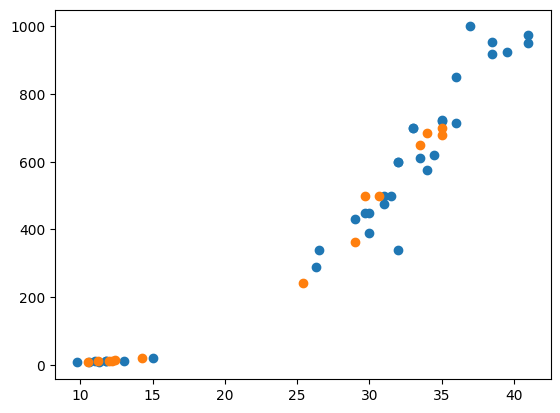

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train[:,0],train[:,1])
plt.scatter(test[:,0],test[:,1])
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()

### 5) 두 번째 머신러닝 프로그램

`kn.fit(), kn.score()`를 이용해서 새로 만든 데이터로 k-최근접이웃분류 모델을 훈련시키고 평가해보자.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

m=KNeighborsClassifier()
m.fit(train,target1)
m.score(test,target2)

1.0

이전의 출력을 보면 test data로 알아본 score 값이 1.0이었다. 즉 정확도가 100%이므로 14개 test data를 완벽히 분류했다는 뜻이다. 데이터로 확인해보자.

In [ ]:
m.predict(test)

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0])

In [ ]:
target2

array([0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0])

어떤 데이터의 분류 결과를 보려면 `kn.predict()`를 이용하면 된다.

* 퀴즈 : 가령 길이가 15cm, 무게가 20g인 생선이 도미인지 빙어인지 분류하는 코드를 적어보자.

In [ ]:
m.predict(np.array([[15, 20]]))

array([0])

* 퀴즈 : 위에서 그린 산점도에 새로운 생선(15cm, 20g)을 나타내보라.

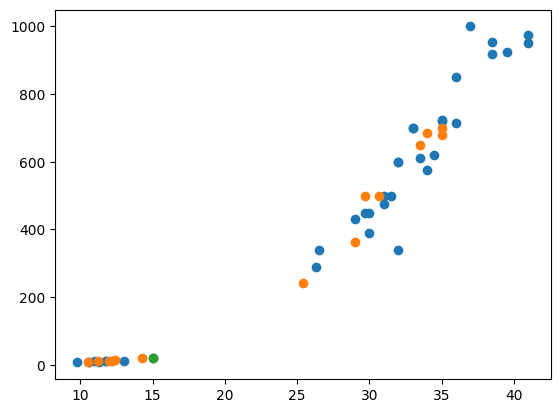

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train[:, 0], train[:, 1])
plt.scatter(test[:, 0], test[:, 1])
plt.scatter(15, 20)
plt.show()

우리가 만든 knn 분류 모델은 그 데이터를 빙어로 분류했다.

## **02-2 데이터 전처리**

In [ ]:
l = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8,
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

In [ ]:
w = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7,
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

In [ ]:
data = [[l, w] for l, w in zip(l, w)]
target = [1]*35 + [0]*14

In [ ]:
import numpy as np

data = np.array(data)
target = np.array(target)

In [ ]:
import numpy as np

i = np.arange(49)

np.random.seed(0)
np.random.shuffle(i)
i

array([29,  4, 26, 30, 32, 37, 34, 40,  7, 10, 11, 31, 33, 27, 48,  2, 46,
       18, 15, 28, 22, 16, 41, 20, 42,  8, 13, 25,  5, 17, 35, 14, 38,  1,
       12, 43, 24,  6, 23, 36, 21, 19,  9, 39, 45,  3,  0, 47, 44])

In [ ]:
train = data[i[:35]]
target1 = target[i[:35]]

In [ ]:
test = data[i[35:]]
target2 = target[i[35:]]

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

m = KNeighborsClassifier()
m.fit(train, target1)
m.score(test, target2)

1.0

이제 도미, 빙어 분류는 다 끝났을까? 아니다. 87쪽을 보라.

길이 25cm, 무게 150g인 도미가 있다. 그런데 앞에서 만든 모델로 분류한 결과는?

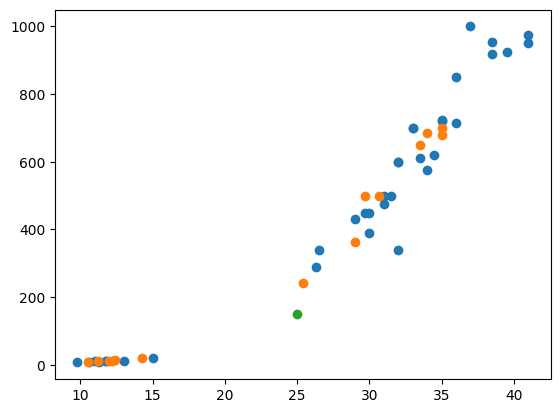

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train[:, 0], train[:, 1])
plt.scatter(test[:, 0], test[:, 1])
plt.scatter(25, 150)
plt.show()

In [ ]:
m.predict([[25, 150]])

array([0])

도미를 빙어로 잘못 분류했다. test data로 평가한 결과 정확도 100%인 모델이었는데 왜 이런 결과가 나왔을까?

다시 데이터를 준비해서 잘 살펴보자.

### 1) 넘파이로 데이터 준비하기


이번에는 더 간단하게 넘파이의 `column_stack()` 함수를 이용해서 두 리스트를 바로 하나의 배열로 결합해보자.

`np.column_stack((a, b, c))`는 a, b, c가 각각 컬럼인 하나의 배열을 만든다.

* 퀴즈 : `np.column_stack()`의 괄호 속에 들어가는 데이터의 타입은? 튜플

tuple에 대해 복습하고 싶다면, 89쪽 '여기서 잠깐'을 읽어보자.





`fish_length, fish_weight`가 컬럼으로 들어가는 2차원 배열 `fish_data`를 만들어보자.

In [ ]:
import numpy as np

data = np.column_stack((l, w))

In [ ]:
print(data[:5])

[[ 25.4 242. ]
 [ 26.3 290. ]
 [ 26.5 340. ]
 [ 29.  363. ]
 [ 29.  430. ]]


이제 35개 값으로 이루어진 target 을 만들자.

In [ ]:
import numpy as np

target=np.concatenate(([1]*35,[0]*14))

In [ ]:
type(target)

numpy.ndarray

### 2) 사이킷런으로 훈련 세트와 테스트 세트 나누기

우리는 앞에서 train, test dataset을 나누기 위해 `index`라는 변수를 만들고 `np.shuffle()`함수를 이용했다. 그런 번거로운 작업대신 일반적으로는 사이킷런 `model_selection` 모듈에 있는 `train_test_split` 함수를 이용한다.

In [ ]:
from sklearn.model_selection import train_test_split

train,test,target1,target2=train_test_split(data,target,random_state=0,stratify=target)

등호 왼쪽에 있는 네 배열이름의 순서를 잘 보라. `input_data`를 먼저 train, test 데이터로 나누고 `target_data`를 역시 train, test 둘로 나눈다. 즉 input 데이터와 target 데이터를 각각 두 개씩 모두 넷으로 나눈다. `random_state` 옵션에 대한 설명은 91쪽 참조.

나눈 결과를 보자. train, test의 비율은 36:13이다. 이유는? 기본값이 3:1이기 때문, 즉 우리가 따로 비율을 지정하지 않으면 train 75%, test 25%로 나눈다.

In [ ]:
print(train.shape,test.shape)

(36, 2) (13, 2)


In [ ]:
print(target1.shape, target2.shape)

(36,) (13,)


넘파이 배열의 크기(shape)은 튜플로 표시된다. 92쪽 설명 참조.

### 3) 수상한 도미 한마리

데이터가 준비되었으니 다시 k-최근접이웃분류 방법으로 분류해보자.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

m = KNeighborsClassifier()
m.fit(train, target1)
m.score(test, target2)

1.0

완벽하다. 정말 test 데이터를 완벽하게 분류했는지 직접 확인해보라.

In [ ]:
sum(target2 == m.predict(test))/len(test)

1.0

그런데 이 모델은 '수상한 도미'(즉 길이 25cm, 무게 150g인 도미)를 잘못 분류한다.

In [ ]:
print(m.predict([[25, 150]]))

[0]


'수상한 도미'가 어떤 생선인지 train 데이터와 함께 산점도를 그려서 알아보자.

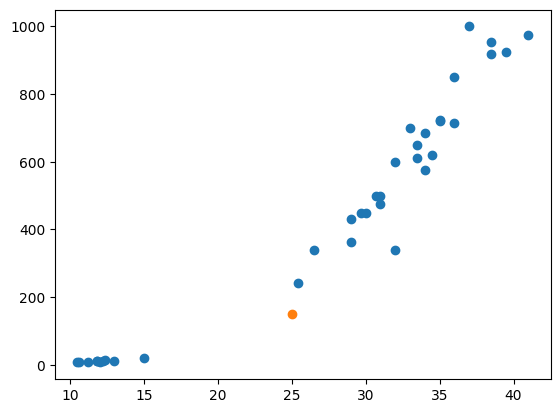

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train[:,0], train[:,1])
plt.scatter(25, 150)
plt.show()

k-nn 분류는 가장 가까운 이웃을 보고 분류하는 방법이다. 그림을 보면 그 생선은 빙어가 아닌 도미로 분류되어야할 것 같다. 그런데 우리가 만든 k-nn 분류모델은 왜 도미를 빙어라고 잘못 분류했을까?

<u>k-nn 분류에서 k의 기본값은 5다.</u> 즉 가장 가까운 데이터 다섯 개를 보고 그중 다수의 target값으로 분류한다. 문제가 되는 생선(길이 25cm, 무게 150g인 도미)과 가장 가까운 다섯 데이터는 어떤 데이터일까?

knn의 `kneighbors` 메서드를 이용하면 가장 가까운 데이터들의 번호와 그 데이터까지의 거리를 알 수 있다.

In [ ]:
d, i = m.kneighbors([[25, 150]])

In [ ]:
i

array([[11, 26, 19, 12, 25]])

In [ ]:
d

array([[ 92.00086956, 130.48375378, 137.17988191, 138.32150953,
        138.39320793]])

`[[25, 150]]` 데이터에서 가장 가까운 데이터는 거리가 92인 11번째 데이터다. 그 점을 포함해서 `[[25, 150]]` 에서 가장 가까운 다섯 데이터를 산점도에 나타내보자.

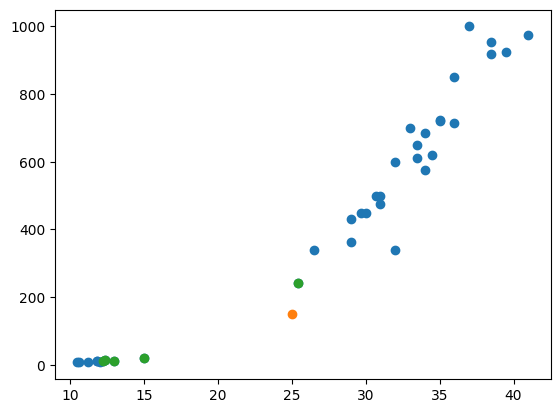

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train[:, 0], train[:, 1])
plt.scatter(25, 150)
plt.scatter(train[i, 0], train[i, 1])
plt.show()

위의 그림과 아래 출력에서 보듯 다섯 개 가운데 도미는 하나뿐이고 네개가 빙어라서 `[[25, 150]]`인 도미가 빙어로 잘못 분류되었다. 다섯 개 데이터는 아래와 같다.

In [ ]:
train[i]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 12.4,  13.4],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

In [ ]:
target1[i]

array([[1, 0, 0, 0, 0]])

### 4) 기준을 맞춰라

이제 점 [25, 150]과 가장 가까운 데이터까지의 거리와 두번째로 가까운 데이터까지의 거리를 살펴보자.

97쪽 그림이 그 두 거리를 나타낸다.

이상한 점이 보일 것이다. 130이라는 거리가 92의 여러 배 크기로 보인다(다섯 배정도 된다. 92 * 5 = 460). 130이 92보다 큰 수이기는 하지만 그림에 나타난 정도로 큰 값은 아니다. 왜 이런 현상이 나타났을까?

<u>두 feature 변수의 scale, 즉 값의 범위가 서로 아주 다르기 때문</u>이다. x축의 '길이' 변수는 범위가 10과 40 사이인 반면 y축의 '무게' 변수는 0부터 1000사이의 값을 갖는다. 따라서 거리(Euclid 거리)를 계산하면 길이는 거의 무시되고 무게만 반영된다.

`plt.xlim((0, 1000))`으로 지정해서 두 축의 범위를 동일하게 만든 아래 그림(98쪽 그림)을 보자. 점들 사이의 거리는 길이의 차이보다는 거의 무게 값의 차이로 결정된다.

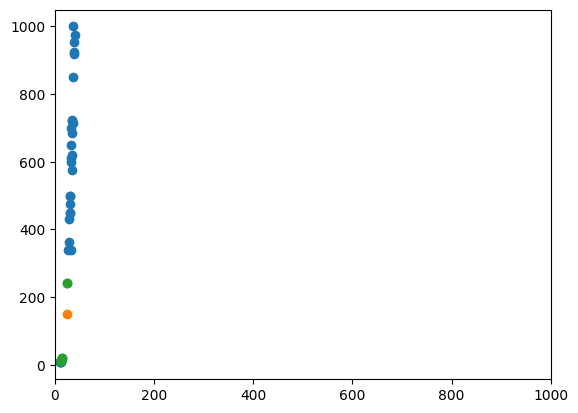

In [ ]:
import matplotlib.pyplot as plt

plt.scatter(train[:, 0], train[:, 1])
plt.scatter(25, 150)
plt.scatter(train[i, 0], train[i, 1])
plt.xlim((0, 1000))
plt.show()

이처럼 서로 다른 척도때문에 feature 변수들의 역할이 달라지는 것은 바람직하지 않다.

해결방법 중 하나는 scale이 다른 변수들을 표준화한 **표준점수(standard score, z-score)**를 이용하는 방법이다. 표준점수를 구하려면 데이터의 평균과 표준편차를 알아야하므로 잠깐 넘파이 복습부터 하자자.

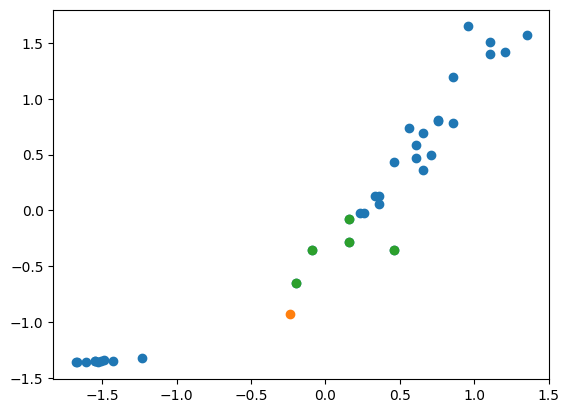

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

ss=StandardScaler()
s1=ss.fit_transform(train)
new=ss.transform([[25,150]])

plt.scatter(s1[:, 0], s1[:, 1])
plt.scatter(new[:,0],new[:,1])
plt.scatter(s1[i, 0], s1[i, 1])
plt.show()

### 5) 전처리 데이터로 모델 훈련하기

성능 평가에는 test data를 이용한다.

  - train data처럼 이 데이터도 표준화해야할까?

  - 표준화한다면 어떤 데이터로 구한 평균, 표준편차를 이용해야할까?

이때 <u>test data를 표준화시킬 때 이용하는 평균과 표준편차는 test data의 평균과 표준편차가 아니고 train data의 평균과 표준편차다. 즉 두 데이터를 동일한 방법으로 표준화해야한다.</u>

In [ ]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()
s2=ss.fit_transform(test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

m = KNeighborsClassifier()
m.fit(s1, target1)
m.score(s2, target2)

1.0

정확도가 100%다. 새 데이터(25cm, 150g) 예측은?

In [ ]:
m.predict(new)

array([1])

올바로 도미라고 분류했다. 그림으로 가까운 점들을 보자.

In [ ]:
distances, indexes = m.kneighbors(new)
indexes

array([[11,  1, 34,  4,  2]])

In [ ]:
target1[indexes]

array([[1, 1, 1, 1, 1]])

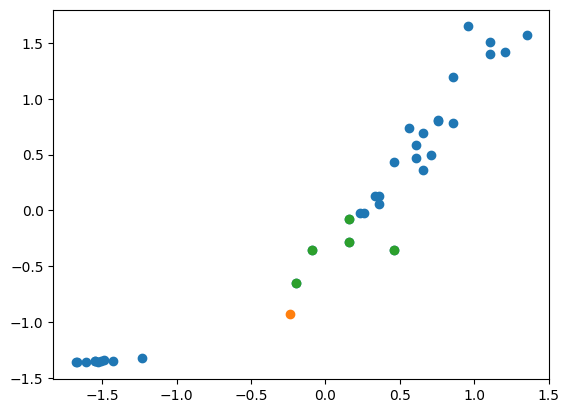

In [ ]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

ss=StandardScaler()
s1=ss.fit_transform(train)

new=ss.transform([[25,150]])
d,i=m.kneighbors(new)

plt.scatter(s1[:, 0], s1[:, 1])
plt.scatter(new[0,0],new[0,1])
plt.scatter(s1[i, 0], s1[i, 1])
plt.show()

표준화하기 전과 다르게 이번에는 다섯 개 모두 도미다.